# **Traffic Accidents Analysis & Prediction**

### **`Importing Dataset`**

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
df=pd.read_csv("TRAFFICACCIDENTS.csv")
df.head()

,State,Date/Time,Month of Accident,Day of the Week,Is Weekend?,Accident Time Slots,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit,Number_of_Deaths,Number_of_Injuries,Severity
0,Delhi,12-06-2023 07:15,June,Monday,0,Off-Peak,Urban,Rainy,No,Yes,Poor,40,1,5,High
1,Manipur,18-05-2023 18:30,May,Thursday,0,Evening Rush Hour,Rural,Sunny,No,No,Good,60,0,4,Low
2,Chhattisgarh,17-05-2023 06:45,May,Wednesday,0,Off-Peak,Rural,Sunny,No,Yes,Fair,70,3,6,High
3,Jharkhand,16-05-2023 13:15,May,Tuesday,0,Afternoon Rush Hour,Urban,Foggy,Yes,No,Good,40,1,2,Moderate
4,Madhya Pradesh,15-05-2023 08:30,May,Monday,0,Morning Rush Hour,Rural,Rainy,No,No,Poor,60,2,5,High


In [149]:
df['Alcohol_Involved']=df['Alcohol_Involved'].map({'Yes':1, 'No':0})
df['Driver_Fatigue']=df['Driver_Fatigue'].map({'Yes':1, 'No':0})
df['Road_Conditions']=df['Road_Conditions'].map({'Poor':0,'Fair':1,'Good':2})
df['Severity']=df['Severity'].map({'Low':0,'Moderate':1,'High':2})
df_encoded = pd.get_dummies(df,columns=['Weather_Conditions','Road_Type','Accident Time Slots'])
df_encoded[df_encoded.select_dtypes(include='bool').columns] = df_encoded.select_dtypes(include='bool').astype(int)
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
day_map = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df_encoded['Month of Accident'] = df_encoded['Month of Accident'].map(month_map)
df_encoded['Day of the Week'] = df_encoded['Day of the Week'].map(day_map)
df_encoded['Date/Time'] = pd.to_datetime(df_encoded['Date/Time'], format='%d-%m-%Y %H:%M')

In [150]:
df_encoded.info()
df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    299 non-null    object        
 1   Date/Time                                299 non-null    datetime64[ns]
 2   Month of Accident                        299 non-null    int64         
 3   Day of the Week                          299 non-null    int64         
 4   Is Weekend?                              299 non-null    int64         
 5   Alcohol_Involved                         299 non-null    int64         
 6   Driver_Fatigue                           299 non-null    int64         
 7   Road_Conditions                          299 non-null    int64         
 8   Speed_Limit                              299 non-null    int64         
 9   Number_of_Deaths                         29

,Date/Time,Month of Accident,Day of the Week,Is Weekend?,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit,Number_of_Deaths,Number_of_Injuries,...,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Road_Type_Rural,Road_Type_Urban,Accident Time Slots_Afternoon Rush Hour,Accident Time Slots_Early Morning,Accident Time Slots_Evening Rush Hour,Accident Time Slots_Morning Rush Hour,Accident Time Slots_Night Traffic,Accident Time Slots_Off-Peak
count,299,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2022-01-18 23:48:27.692307712,4.515050,3.903010,0.304348,0.334448,0.284281,1.006689,56.989967,1.755853,2.645485,...,0.013378,0.578595,0.478261,0.521739,0.267559,0.040134,0.167224,0.197324,0.207358,0.120401
min,2021-05-01 15:30:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-22 15:55:00,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-02-21 14:15:00,5.000000,4.000000,0.000000,0.000000,0.000000,1.000000,60.000000,2.000000,2.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-04-11 20:15:00,6.000000,6.000000,1.000000,1.000000,1.000000,2.000000,60.000000,2.500000,4.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-06-12 07:15:00,12.000000,7.000000,1.000000,1.000000,1.000000,2.000000,90.000000,5.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,2.186507,2.080742,0.460902,0.472588,0.451827,0.863088,13.042390,1.076249,1.452170,...,0.115079,0.494612,0.500365,0.500365,0.443428,0.196602,0.373801,0.398646,0.406094,0.325976


In [151]:
df_encoded.head()

,State,Date/Time,Month of Accident,Day of the Week,Is Weekend?,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit,Number_of_Deaths,...,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Road_Type_Rural,Road_Type_Urban,Accident Time Slots_Afternoon Rush Hour,Accident Time Slots_Early Morning,Accident Time Slots_Evening Rush Hour,Accident Time Slots_Morning Rush Hour,Accident Time Slots_Night Traffic,Accident Time Slots_Off-Peak
0,Delhi,2023-06-12 07:15:00,6,1,0,0,1,0,40,1,...,0,0,0,1,0,0,0,0,0,1
1,Manipur,2023-05-18 18:30:00,5,4,0,0,0,2,60,0,...,0,1,1,0,0,0,1,0,0,0
2,Chhattisgarh,2023-05-17 06:45:00,5,3,0,0,1,1,70,3,...,0,1,1,0,0,0,0,0,0,1
3,Jharkhand,2023-05-16 13:15:00,5,2,0,1,0,2,40,1,...,0,0,0,1,1,0,0,0,0,0
4,Madhya Pradesh,2023-05-15 08:30:00,5,1,0,0,0,0,60,2,...,0,0,1,0,0,0,0,1,0,0


# `NOW THE DATASET IS CLEANED AND READY TO USE FOR FURTHER ANALYSIS/PREDICTION`

# **EXPLORATORY DATA ANALYSIS**

### We can follow a systematic approach to understand the distribution of the data, identify any patterns, and explore relationships between variables.

# **Univariate Analysis**

a. Categorical Columns Distribution

b. Numerical Columns Distribution

<ipython-input-152-ac2aae90c7aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='State', data=df_encoded, order=df_encoded['State'].value_counts().index, palette='viridis')


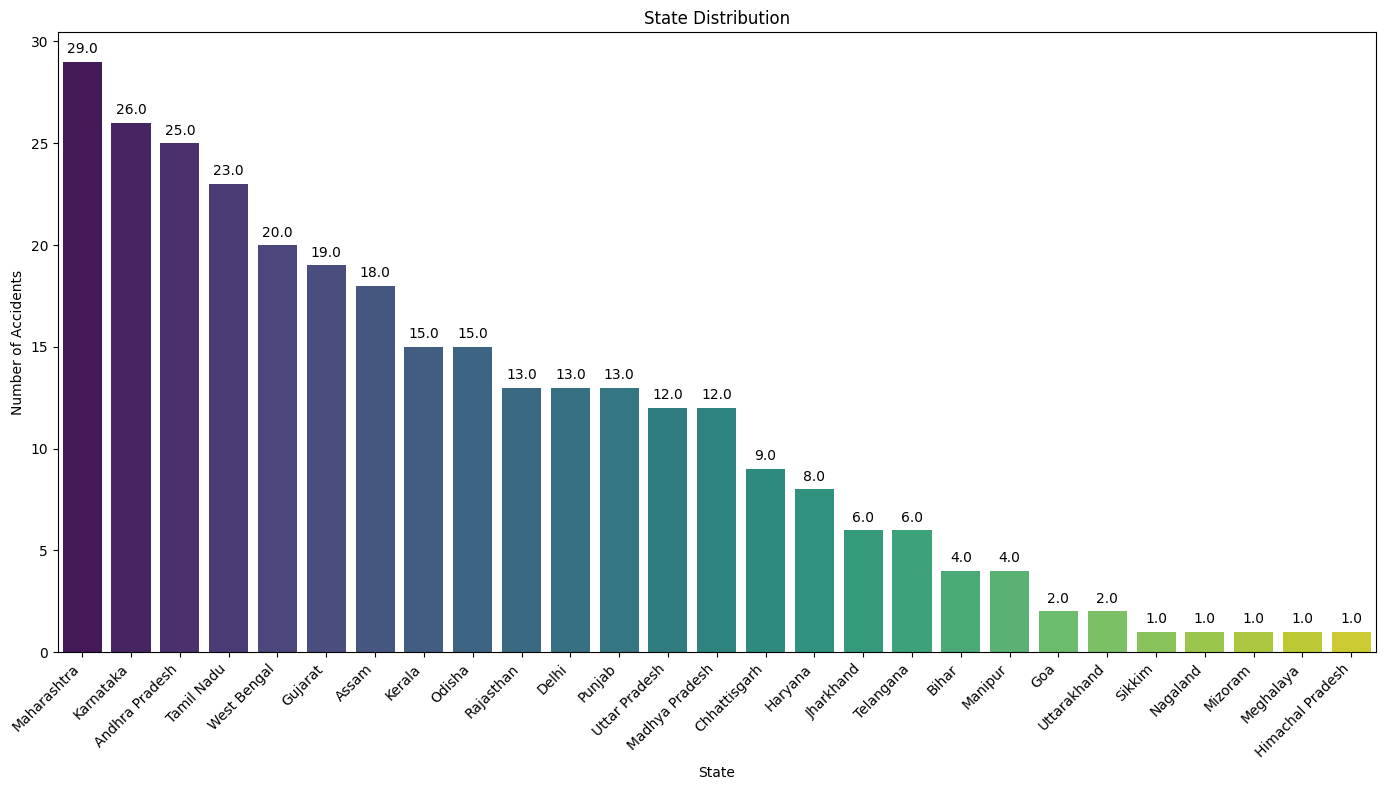

In [152]:
plt.figure(figsize=(14, 8))  # Increase the figure width for better spacing

# Create the count plot with sorting
ax = sns.countplot(x='State', data=df_encoded, order=df_encoded['State'].value_counts().index, palette='viridis')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 9), textcoords='offset points')

# Title and labels
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

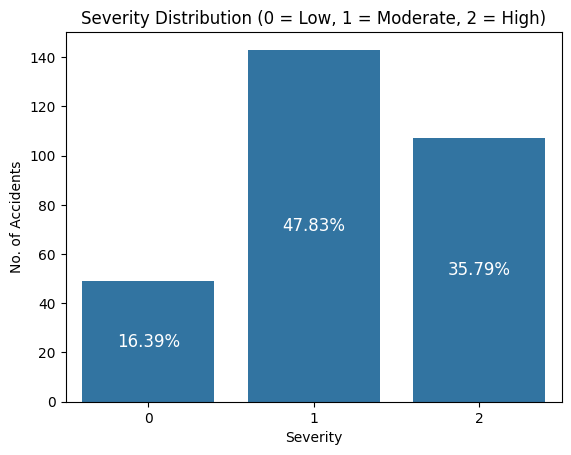

In [153]:
# Plot the countplot
ax = sns.countplot(x='Severity', data=df_encoded)

# Get the total number of accidents
total = len(df_encoded)

# Add percentage labels inside the bars
for p in ax.patches:
    # Get the height of each bar (number of accidents in that category)
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total) * 100
    # Add the label inside the bar, adjusting for placement inside
    ax.text(p.get_x() + p.get_width() / 2, height / 2,
            f'{percentage:.2f}%', ha='center', va='center', fontsize=12, color='white')

# Set the title and labels
plt.title('Severity Distribution (0 = Low, 1 = Moderate, 2 = High)')
plt.xlabel('Severity')
plt.ylabel('No. of Accidents')

# Show the plot
plt.show()

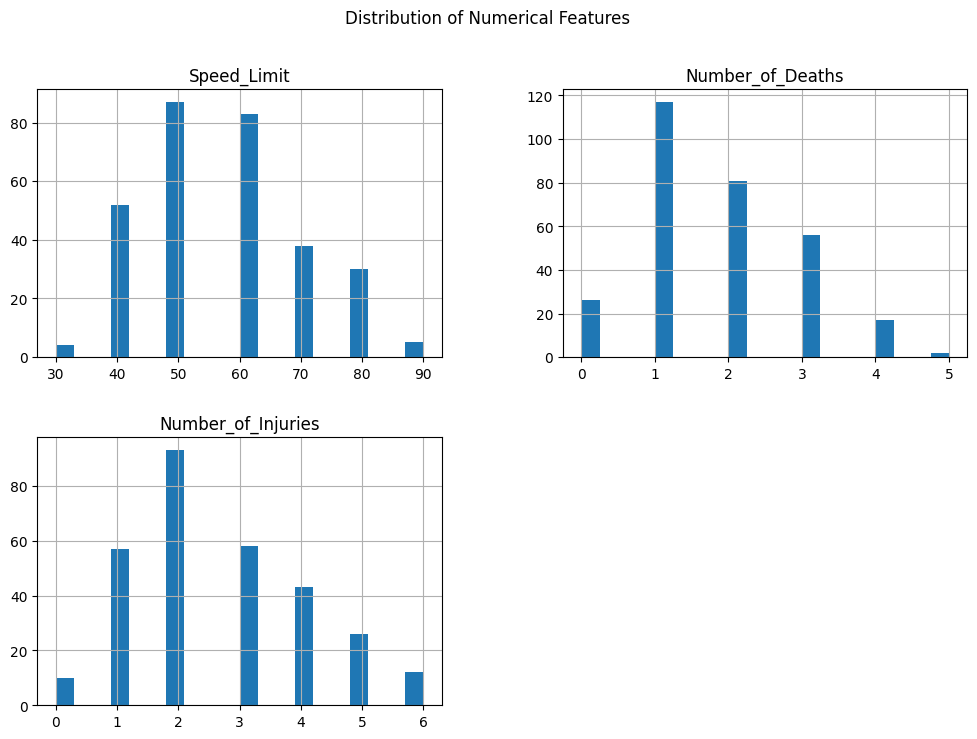

In [154]:
# Histograms for numerical features
df_encoded[['Speed_Limit', 'Number_of_Deaths', 'Number_of_Injuries']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# **Bivariate Analysis**

a. Correlation Heatmap

b. Pairplot

c. Categorical vs Numerical Analysis

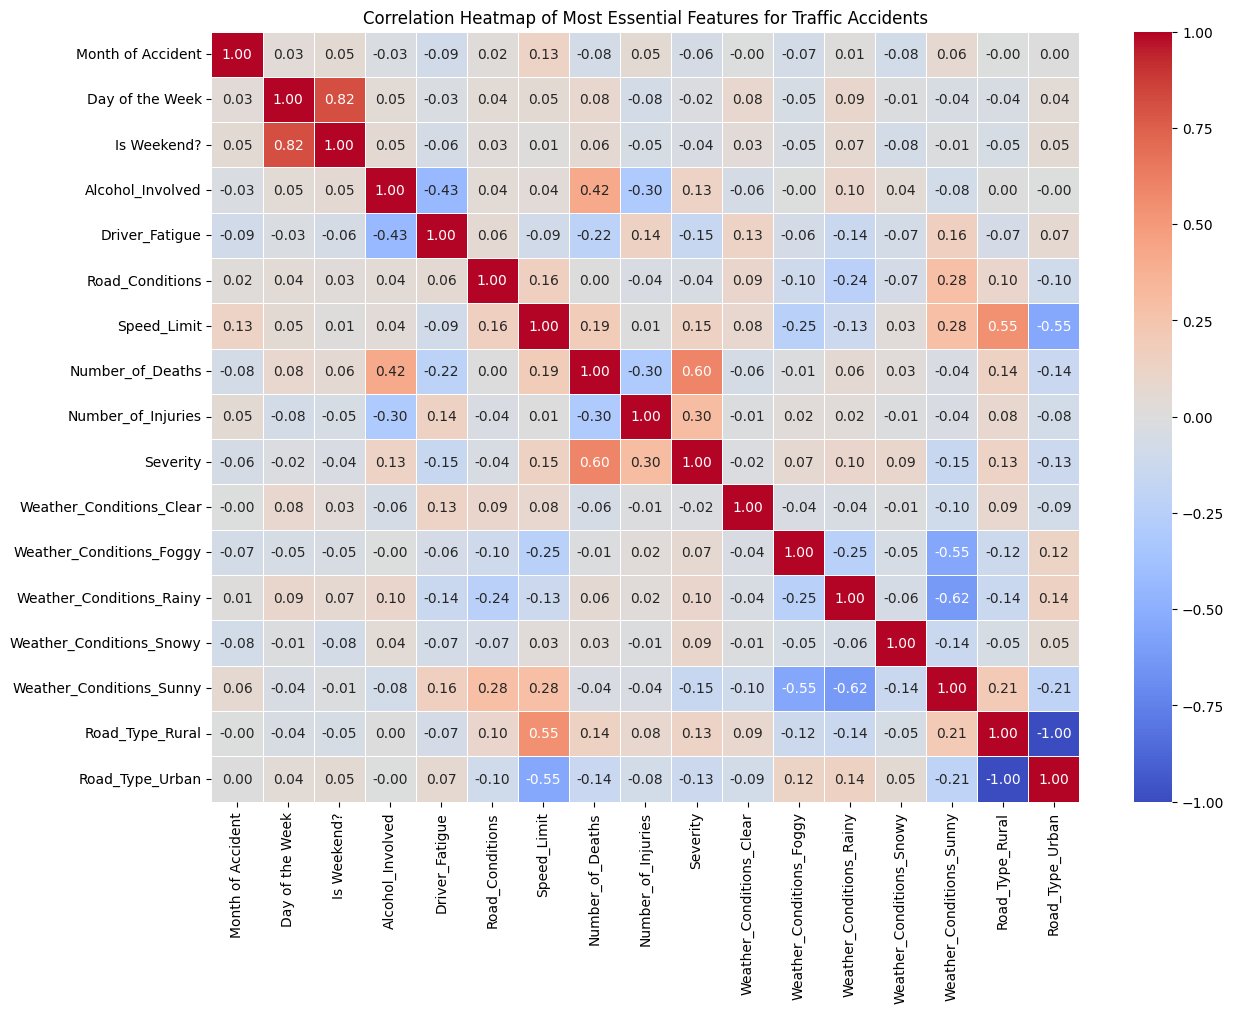

In [155]:
essential_columns = [
    'Month of Accident', 'Day of the Week', 'Is Weekend?',
    'Alcohol_Involved', 'Driver_Fatigue', 'Road_Conditions',
    'Speed_Limit', 'Number_of_Deaths', 'Number_of_Injuries', 'Severity',
    'Weather_Conditions_Clear', 'Weather_Conditions_Foggy',
    'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
    'Weather_Conditions_Sunny', 'Road_Type_Rural', 'Road_Type_Urban'
]

# Subset the dataframe with the selected columns
df_selected = df_encoded[essential_columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Most Essential Features for Traffic Accidents')
plt.show()

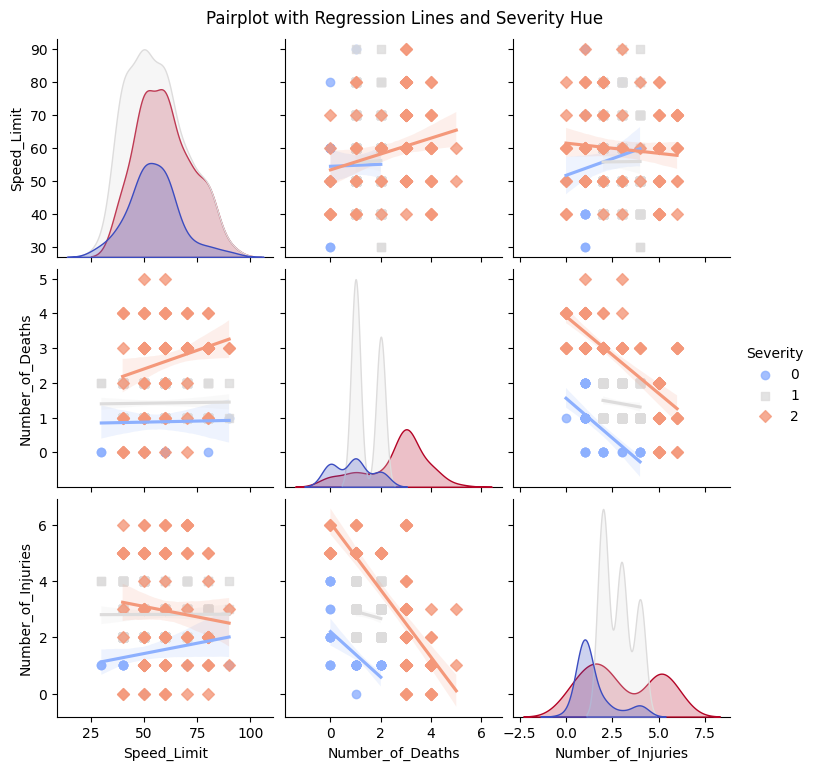

In [156]:
# Plot with hue for 'Severity' and kind='reg' for regression lines
sns.pairplot(df_encoded[['Speed_Limit', 'Number_of_Deaths', 'Number_of_Injuries', 'Severity']],
             hue='Severity', kind='reg', palette='coolwarm', markers=['o', 's', 'D'])

plt.suptitle('Pairplot with Regression Lines and Severity Hue', y=1.02)
plt.show()

<ipython-input-157-93dbbfbbca94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Speed_Limit', data=df_encoded, palette='coolwarm')


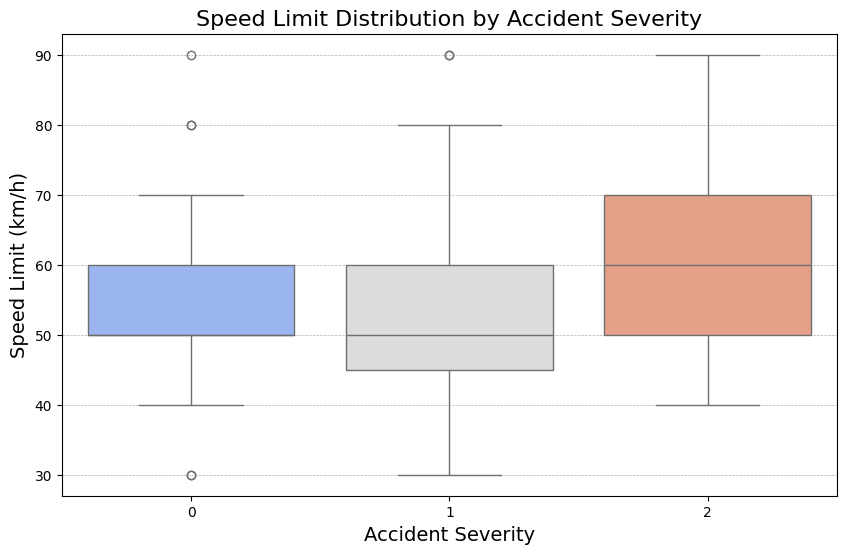

<ipython-input-157-93dbbfbbca94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Number_of_Deaths', data=df_encoded, palette='coolwarm')


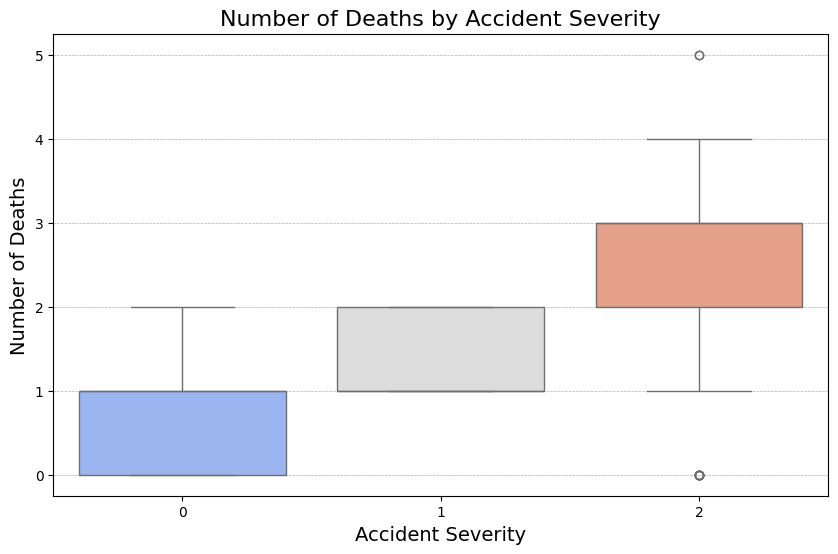

In [157]:
# Boxplot for Severity vs Speed Limit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Speed_Limit', data=df_encoded, palette='coolwarm')
plt.title('Speed Limit Distribution by Accident Severity', fontsize=16)
plt.xlabel('Accident Severity', fontsize=14)
plt.ylabel('Speed Limit (km/h)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  # Gridlines for easier reading
plt.show()

# Boxplot for Severity vs Number of Deaths
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Number_of_Deaths', data=df_encoded, palette='coolwarm')
plt.title('Number of Deaths by Accident Severity', fontsize=16)
plt.xlabel('Accident Severity', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  # Gridlines for easier reading
plt.show()

# **Time-Based Analysis**

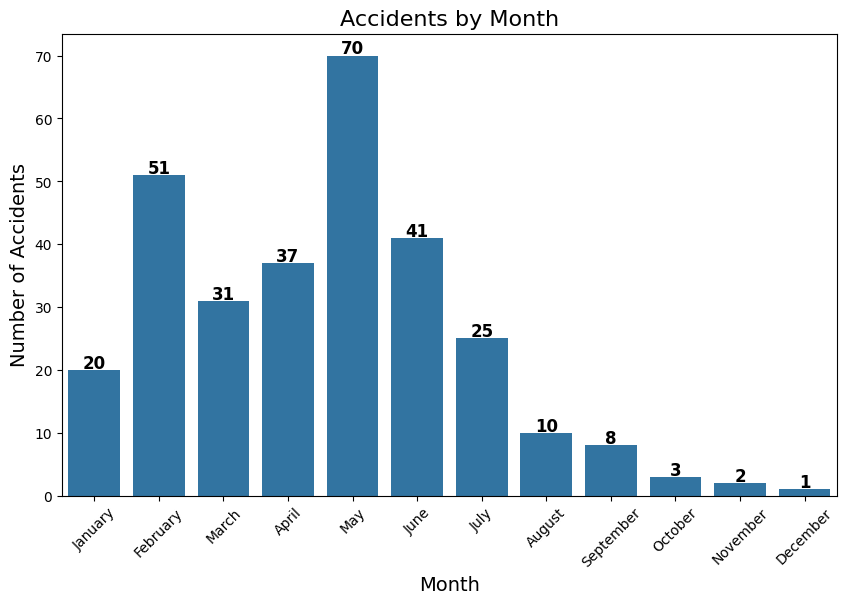

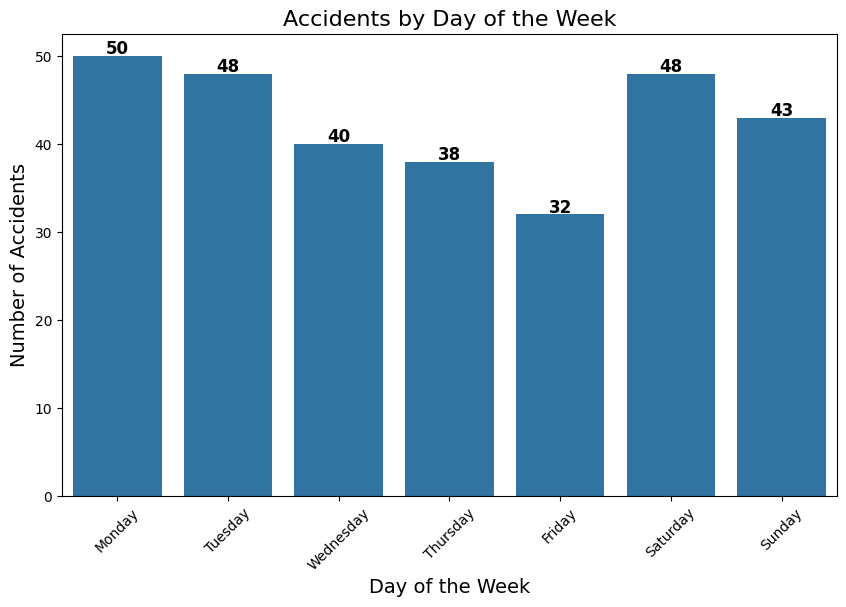

In [158]:
# Extract month and day of the week from Date/Time
df_encoded['Month'] = df_encoded['Date/Time'].dt.month
df_encoded['Day of the Week'] = df_encoded['Date/Time'].dt.day_name()

# Plot accidents by month (with month names on the x-axis)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Month', data=df_encoded, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title('Accidents by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)

# Add data labels (count of accidents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot accidents by day of the week (sorted by name of the week)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Day of the Week', data=df_encoded, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)

# Add data labels (count of accidents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

plt.show()

# **Weekend vs Weekday Analysis**

<ipython-input-159-aa0dad814b2e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


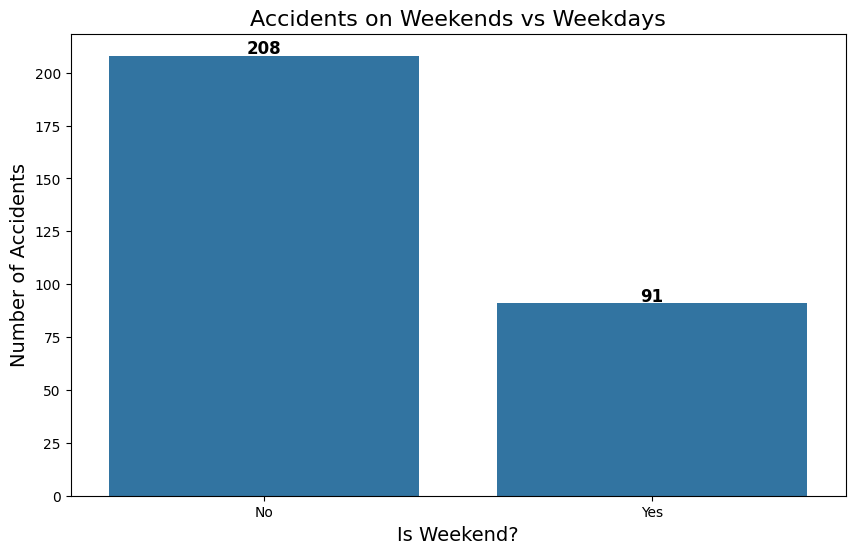

In [159]:
# Plotting accidents based on weekends vs weekdays
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Is Weekend?', data=df_encoded)

# Change x-axis labels from 0/1 to 'No'/'Yes'
ax.set_xticklabels(['No', 'Yes'])

# Title and labels
plt.title('Accidents on Weekends vs Weekdays', fontsize=16)
plt.xlabel('Is Weekend?', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Add data labels (count of accidents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

plt.show()

# **Weather and Road Condition Analysis**

<ipython-input-160-3bace168608d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weather_data.index, y=weather_data.values, palette=colors)


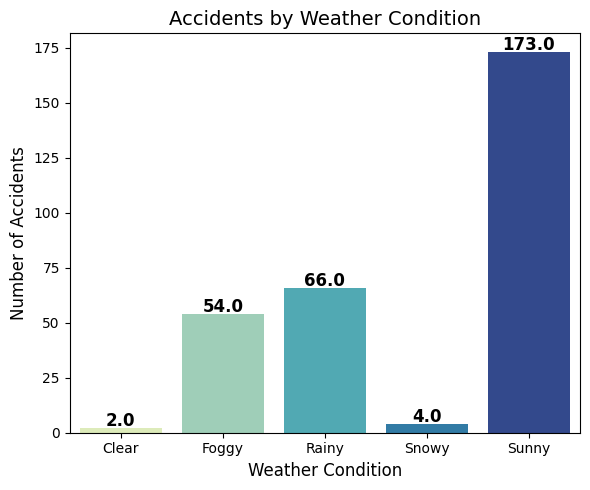

In [160]:
weather_conditions = {
    'Weather_Conditions_Clear': 'Clear',
    'Weather_Conditions_Foggy': 'Foggy',
    'Weather_Conditions_Rainy': 'Rainy',
    'Weather_Conditions_Snowy': 'Snowy',
    'Weather_Conditions_Sunny': 'Sunny'
}

# Plotting
weather_data = df_encoded[weather_conditions.keys()].sum()
weather_data.index = weather_conditions.values()  # Rename to simpler labels

# Set the color palette for the bar plot (from purple/violet to greenish yellow)
colors = sns.color_palette("YlGnBu", len(weather_data))

# Plot with smaller figsize
plt.figure(figsize=(6, 5))  # Smaller plot size
ax = sns.barplot(x=weather_data.index, y=weather_data.values, palette=colors)
plt.title('Accidents by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(fontsize=10)  # Adjusted font size for x-axis labels

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

<ipython-input-161-999c9f311cd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_encoded, x='Road_Type_Urban', palette='Set2')


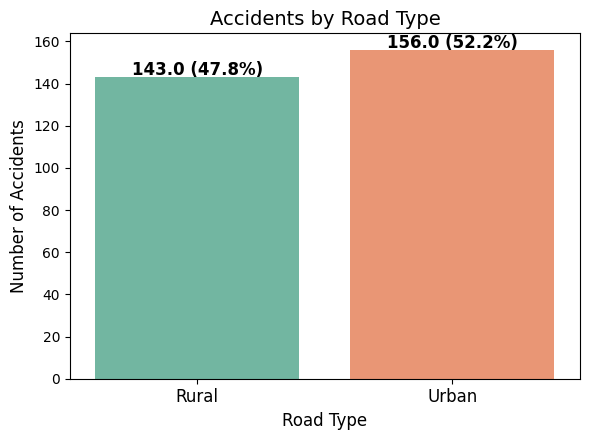

In [161]:
plt.figure(figsize=(6, 4.5))

# Use countplot to visualize accidents by Road Type (Urban vs Rural)
ax = sns.countplot(data=df_encoded, x='Road_Type_Urban', palette='Set2')

# Customize the plot for better understanding
plt.title('Accidents by Road Type', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks([0, 1], ['Rural', 'Urban'], fontsize=12)  # Rename x-tick labels for clarity

# Add data labels on top of each bar
total_accidents = len(df_encoded)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_accidents) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12,
                color='black', fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

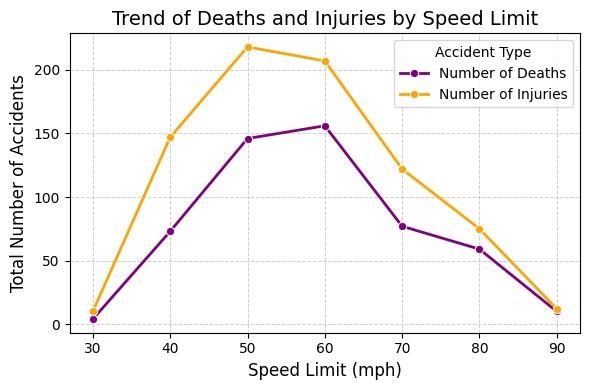

In [162]:
death_data = df_encoded.groupby('Speed_Limit')['Number_of_Deaths'].sum().reset_index()
injury_data = df_encoded.groupby('Speed_Limit')['Number_of_Injuries'].sum().reset_index()

plt.figure(figsize=(6, 4))

# Line plot for Number of Deaths
sns.lineplot(data=death_data, x='Speed_Limit', y='Number_of_Deaths', marker='o', label='Number of Deaths', color='purple', linewidth=2)

# Line plot for Number of Injuries
sns.lineplot(data=injury_data, x='Speed_Limit', y='Number_of_Injuries', marker='o', label='Number of Injuries', color='orange', linewidth=2)

# Title and labels
plt.title('Trend of Deaths and Injuries by Speed Limit', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Total Number of Accidents', fontsize=12)

# Enable grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Show legend
plt.legend(title='Accident Type')

# Show plot
plt.tight_layout()
plt.show()

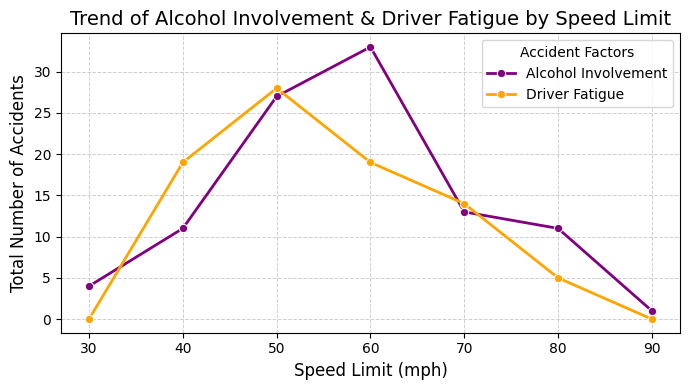

In [163]:
alcohol_data = df.groupby('Speed_Limit')['Alcohol_Involved'].sum().reset_index()
fatigue_data = df.groupby('Speed_Limit')['Driver_Fatigue'].sum().reset_index()

# Line plot for Alcohol Involvement and Driver Fatigue by Speed Limit
plt.figure(figsize=(7, 4))

# Line plot for Alcohol Involvement
sns.lineplot(data=alcohol_data, x='Speed_Limit', y='Alcohol_Involved', marker='o', label='Alcohol Involvement', color='purple', linewidth=2)

# Line plot for Driver Fatigue
sns.lineplot(data=fatigue_data, x='Speed_Limit', y='Driver_Fatigue', marker='o', label='Driver Fatigue', color='orange', linewidth=2)

# Title and labels
plt.title('Trend of Alcohol Involvement & Driver Fatigue by Speed Limit', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Total Number of Accidents', fontsize=12)

# Enable grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Show legend
plt.legend(title='Accident Factors')

# Show plot
plt.tight_layout()
plt.show()

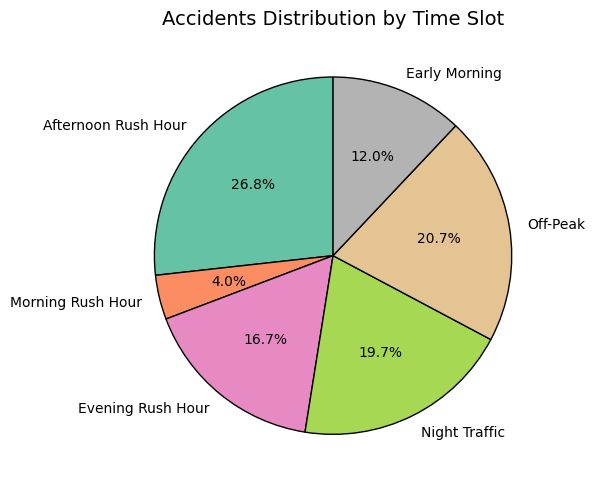

In [164]:
plt.figure(figsize=(6, 6))
time_slots_data.plot(kind='pie', autopct='%1.1f%%', labels=short_time_slots,
                     cmap='Set2', startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Accidents Distribution by Time Slot', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [165]:
df_encoded['Day of the Week'] = df_encoded['Day of the Week'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
df_encoded = df_encoded.drop(columns=['Month'])

# **ACCIDENT OCCURENCE PREDICTION MODEL**

In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming df_encoded is already your cleaned dataset with only numeric columns
# Select only numeric columns for training (all the columns you mentioned)
df_numeric = df_encoded.select_dtypes(include=['int64'])  # Select only integer columns (numeric)
X = df_numeric.drop(['Severity'], axis=1)  # All columns except 'Severity' are features
y = df_numeric['Severity']  # 'Severity' is the target variable

# Step 1: Scale the data (in-memory)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features to scale them

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model (you can use any other model here)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model (you can skip this step if not needed)
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Now, let's define the function that will predict based on user input

# Function to get user input for all fields
def get_user_input():
    user_input = {}

    # Get basic input fields
    user_input["Month of Accident"] = int(input("Enter the month of the accident (1-12): "))
    user_input["Day of the Week"] = int(input("Enter the day of the week (0 = Sunday, 6 = Saturday): "))
    user_input["Is Weekend?"] = int(input("Is it a weekend? (1 for Yes, 0 for No): "))
    user_input["Alcohol_Involved"] = int(input("Was alcohol involved? (1 for Yes, 0 for No): "))
    user_input["Driver_Fatigue"] = int(input("Was the driver fatigued? (1 for Yes, 0 for No): "))
    user_input["Road_Conditions"] = int(input("Enter the road condition (0 = Poor, 1 = Fair, 2 = Good): "))
    user_input["Speed_Limit"] = int(input("Enter the speed limit (in km/h or mph): "))
    user_input["Number_of_Deaths"] = int(input("Enter the number of deaths (0 or more): "))
    user_input["Number_of_Injuries"] = int(input("Enter the number of injuries (0 or more): "))

    # Get encoded inputs for weather conditions, road type, and accident time slots
    weather_conditions = get_exclusive_input({
        "Clear": "Was the weather clear? (1 for Yes, 0 for No): ",
        "Foggy": "Was the weather foggy? (1 for Yes, 0 for No): ",
        "Rainy": "Was the weather rainy? (1 for Yes, 0 for No): ",
        "Snowy": "Was the weather snowy? (1 for Yes, 0 for No): ",
        "Sunny": "Was the weather sunny? (1 for Yes, 0 for No): "
    })

    road_type = get_exclusive_input({
        "Rural": "Is the road rural? (1 for Yes, 0 for No): ",
        "Urban": "Is the road urban? (1 for Yes, 0 for No): "
    })

    accident_time_slots = get_exclusive_input({
        "Afternoon Rush Hour": "Is it afternoon rush hour? (1 for Yes, 0 for No): ",
        "Early Morning": "Is it early morning? (1 for Yes, 0 for No): ",
        "Evening Rush Hour": "Is it evening rush hour? (1 for Yes, 0 for No): ",
        "Morning Rush Hour": "Is it morning rush hour? (1 for Yes, 0 for No): ",
        "Night Traffic": "Is it night traffic? (1 for Yes, 0 for No): ",
        "Off-Peak": "Is it off-peak time? (1 for Yes, 0 for No): "
    })

    # Combine all inputs into the final user input dictionary
    user_input.update(weather_conditions)
    user_input.update(road_type)
    user_input.update(accident_time_slots)

    # Return user input as a numpy array
    return np.array(list(user_input.values())).reshape(1, -1)

# Helper function to get exclusive (encoded) input
def get_exclusive_input(field_group):
    options = list(field_group.keys())
    print(f"Select one option from the following:")
    for idx, option in enumerate(options):
        print(f"{idx}: {option}")

    valid_input = False
    while not valid_input:
        choice = int(input("Enter the number of your choice: "))
        if 0 <= choice < len(options):
            # Create a dictionary of zeros and set the selected one to 1
            exclusive_input = {option: 0 for option in options}
            exclusive_input[options[choice]] = 1
            valid_input = True
        else:
            print("Invalid input. Please select a valid number.")
    return exclusive_input

# Step 5: Get user input
user_data = get_user_input()

# Step 6: Scale the input data
user_data_scaled = scaler.transform(user_data)

# Step 7: Predict the probability for each severity level
predicted_probabilities = model.predict_proba(user_data_scaled)

# Step 8: Convert probabilities to percentages
severity_levels = ['low', 'moderate', 'high']
severity_percentages = {
    severity_levels[i]: round(predicted_probabilities[0][i] * 100, 2)
    for i in range(len(severity_levels))
}

# Step 9: Display the probability percentages for each severity level
print("\nPrediction probabilities:")
for level, percentage in severity_percentages.items():
    print(f"{level.capitalize()}: {percentage}%")

# Step 10: Find the most likely severity level and display the result
predicted_severity_class = np.argmax(predicted_probabilities)
severity_map = {
    0: "low",
    1: "moderate",
    2: "high"
}

severity_label = severity_map.get(predicted_severity_class, "Unknown")
print(f"\nBased on the input data, the predicted accident severity is: {severity_label}")


Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.75      1.00      0.86        15
           2       1.00      1.00      1.00        27

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.90        60
weighted avg       0.94      0.92      0.92        60

Enter the month of the accident (1-12): 5
Enter the day of the week (0 = Sunday, 6 = Saturday): 1
Is it a weekend? (1 for Yes, 0 for No): 0
Was alcohol involved? (1 for Yes, 0 for No): 1
Was the driver fatigued? (1 for Yes, 0 for No): 0
Enter the road condition (0 = Poor, 1 = Fair, 2 = Good): 2
Enter the speed limit (in km/h or mph): 60
Enter the number of deaths (0 or more): 0
Enter the number of injuries (0 or more): 3
Select one option from the following:
0: Clear
1: Foggy
2: Rainy
3: Snowy
4: Sunny
Enter the number of your choice: 2
Select one option from the following:
0: Rural
1: Urban
E

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [167]:
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Summary of the Traffic Accidents Analysis and Prediction Project`**

**Motive**:
The goal was to predict the severity of traffic accidents based on various factors (e.g., weather, road conditions, alcohol involvement). This prediction can help improve safety measures and inform decision-making in real-time.

**Accomplishments**:
- Data Preprocessing: We cleaned the dataset and selected only relevant numeric features for model training.
- Model Training: A RandomForestClassifier was trained on the data to predict accident severity.
- User Input Handling: We created an interactive system for users to input data, ensuring valid values for encoded columns.
- Prediction: The trained model predicts accident severity (low, moderate, high) based on user inputs.

**Outcome**:
The project achieved an accuracy of 92% in predicting accident severity. The model successfully predicts whether an accident is likely to be of low, moderate, or high severity based on input features. This system can assist in traffic safety planning and real-time emergency responses.

# **`THANK YOU!!`**